In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import deque

In [24]:

class CustomFrameStack(gym.Wrapper):
    def __init__(self, env, num_stack=4, frame_skip=1):
        super(CustomFrameStack, self).__init__(env)
        self.num_stack = num_stack
        self.frame_skip = frame_skip
        self.frames = deque(maxlen=num_stack)

        # Úprava observation space: 3 kanály pre RGB a 3 kanály pre rozdiely v grayscale
        h, w, c = env.observation_space.shape
        self.observation_space = gym.spaces.Box(
            low=0, high=255, shape=(h, w, 4), dtype=np.uint8)

    def reset(self):
        obs, _ = self.env.reset()
        # Inicializácia frames deque s prvým frame-om (RGB)
        for _ in range(self.num_stack):
            self.frames.append(cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY))
        return self._get_stacked_obs()

    def step(self, action):
        total_reward = 0
        for _ in range(self.frame_skip):
            # Vykonaj akciu na preskočenie frameov a pridaj reward
            obs, reward, done, truncated, info = self.env.step(action)

            self.frames.append(cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY))
            total_reward += reward
            if done or truncated:
                break

        # Pridaj nový frame (po frame skippingu) do deque

        return self._get_stacked_obs(), total_reward, done, truncated, info

    def _get_stacked_obs(self):
        # Posledný frame
        last_frame = self.frames[-1]

        # Konštantná šedá hodnota (napr. 128 pre strednú šedú)
        gray_base = 128

        grayscale_diffs = []
        grayscale_diffs.append(last_frame[..., np.newaxis])
    
        compare_frame = last_frame
        for frame in reversed(list(self.frames)[:-1]):  # Vynecháme posledný frame
            # Rozdiel oproti poslednému frame, kde sa zachovajú pozitívne aj negatívne zmeny
            #diff = compare_frame.astype(np.int16) - frame.astype(np.int16)
            #diff = np.clip(diff + gray_base, 0, 255).astype(np.uint8)  # Uisti sa, že hodnoty sú v rozsahu 0-255

            #grayscale_diffs.append(diff[..., np.newaxis])  # Pridaj novú dimenziu pre channel

            #compare_frame = frame
            grayscale_diffs.append(frame[..., np.newaxis])

        # Stack všetky rozdielové frames a posledný frame do jedného pozorovania
        stacked_obs = np.concatenate(grayscale_diffs, axis=-1)
    
        return stacked_obs


In [31]:
# Vytvorenie prostredia a použitie vlastného wrapperu
env = gym.make("SpaceInvaders-v4")
env = gym.wrappers.ResizeObservation(env, (224, 224))
stacked_env = CustomFrameStack(env)

Step 21: observation shape: (224, 224, 4)


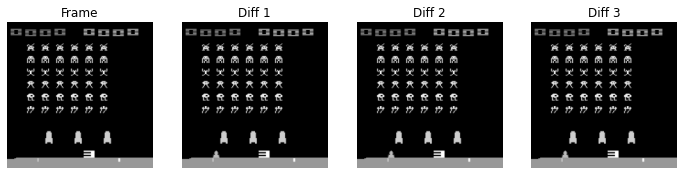

Step 22: observation shape: (224, 224, 4)


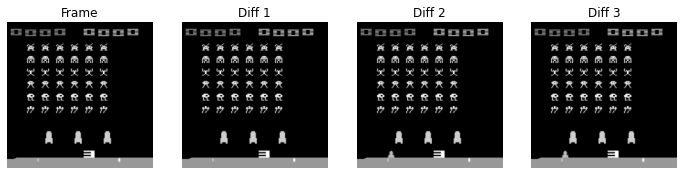

Step 23: observation shape: (224, 224, 4)


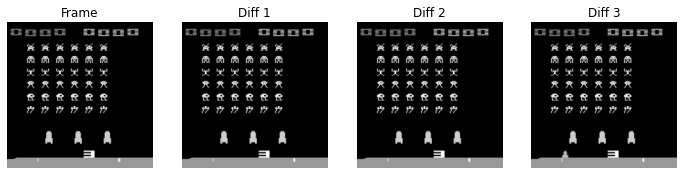

Step 24: observation shape: (224, 224, 4)


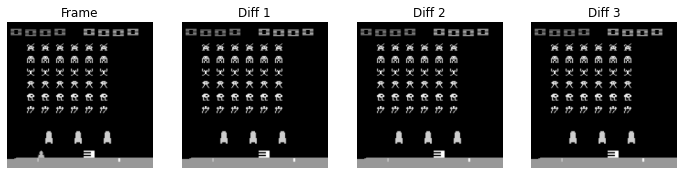

Step 25: observation shape: (224, 224, 4)


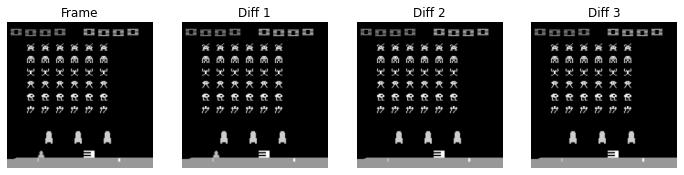

Step 26: observation shape: (224, 224, 4)


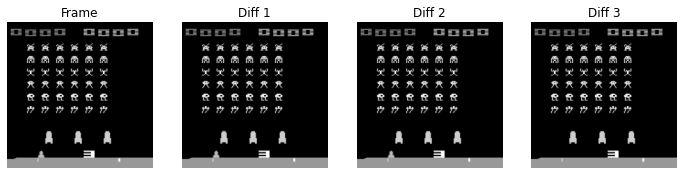

Step 27: observation shape: (224, 224, 4)


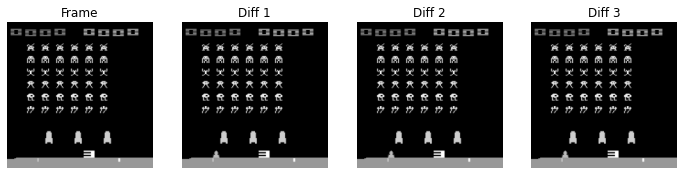

Step 28: observation shape: (224, 224, 4)


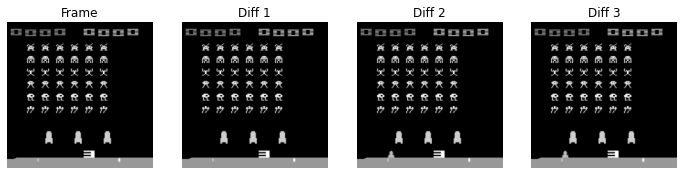

Step 29: observation shape: (224, 224, 4)


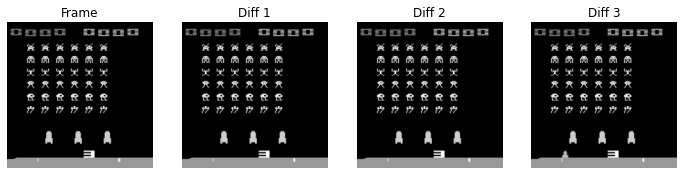

Step 30: observation shape: (224, 224, 4)


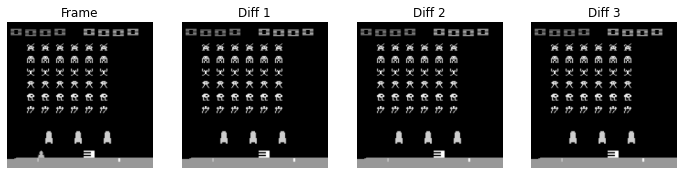

Step 31: observation shape: (224, 224, 4)


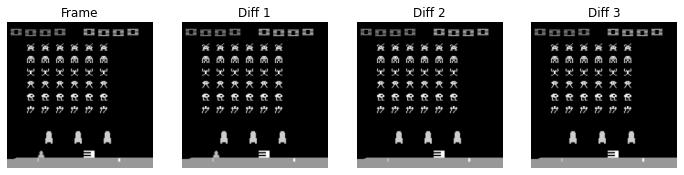

Step 32: observation shape: (224, 224, 4)


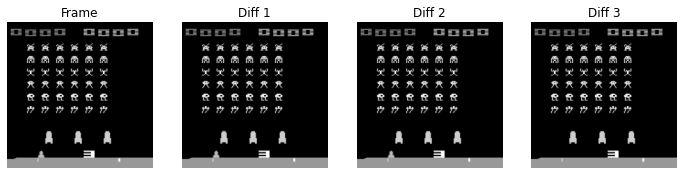

Step 33: observation shape: (224, 224, 4)


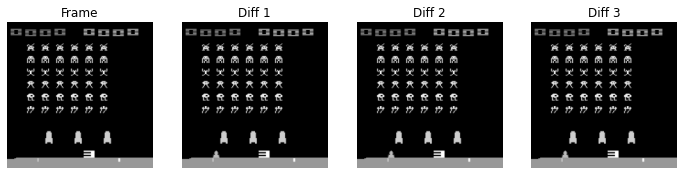

Step 34: observation shape: (224, 224, 4)


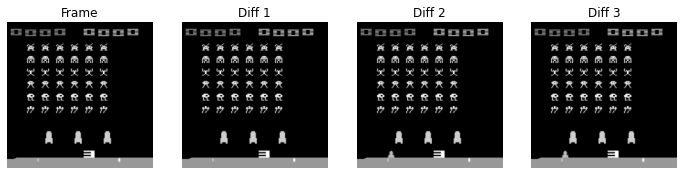

Step 35: observation shape: (224, 224, 4)


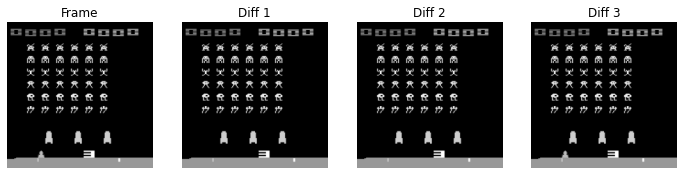

Step 36: observation shape: (224, 224, 4)


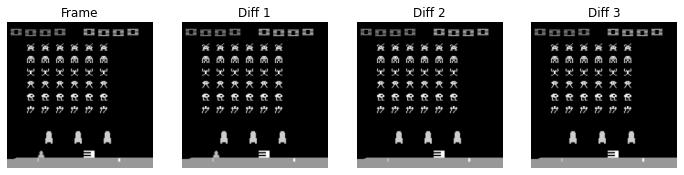

Step 37: observation shape: (224, 224, 4)


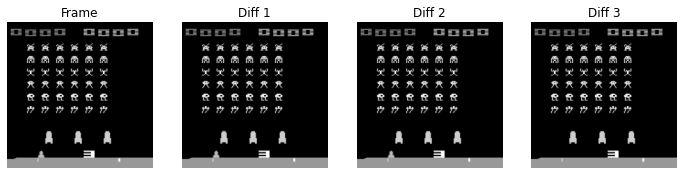

Step 38: observation shape: (224, 224, 4)


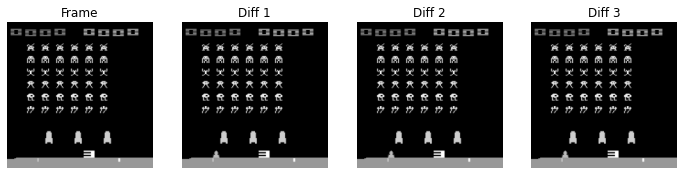

Step 39: observation shape: (224, 224, 4)


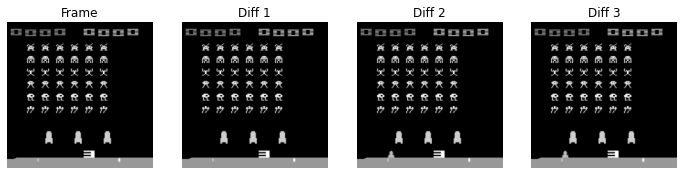

Step 40: observation shape: (224, 224, 4)


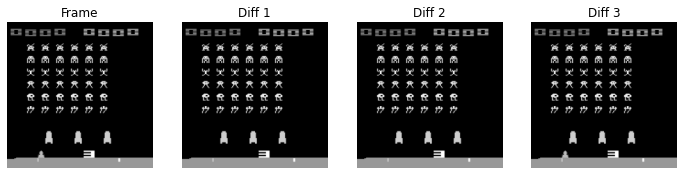

Step 41: observation shape: (224, 224, 4)


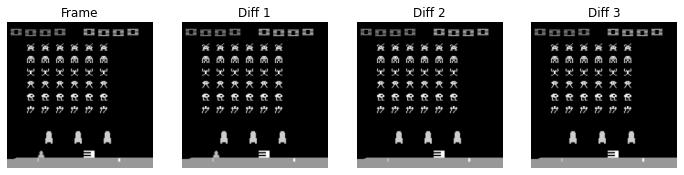

Step 42: observation shape: (224, 224, 4)


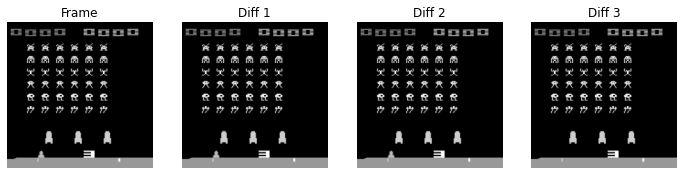

Step 43: observation shape: (224, 224, 4)


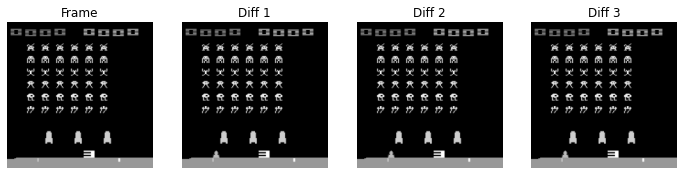

Step 44: observation shape: (224, 224, 4)


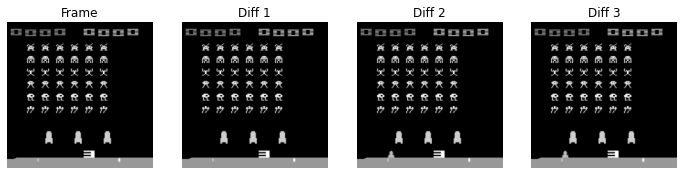

Step 45: observation shape: (224, 224, 4)


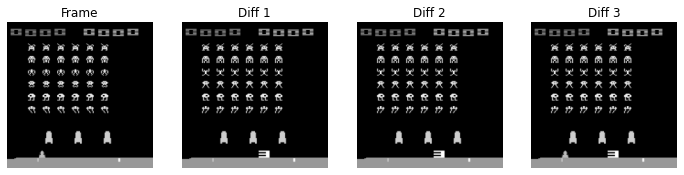

Step 46: observation shape: (224, 224, 4)


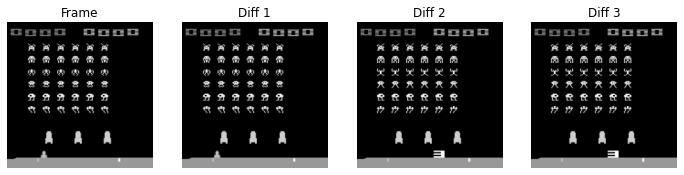

Step 47: observation shape: (224, 224, 4)


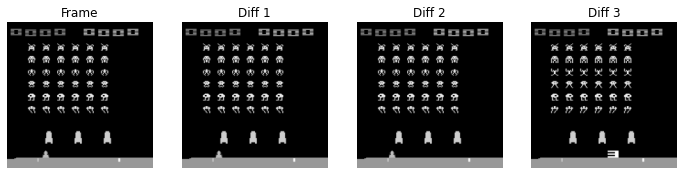

Step 48: observation shape: (224, 224, 4)


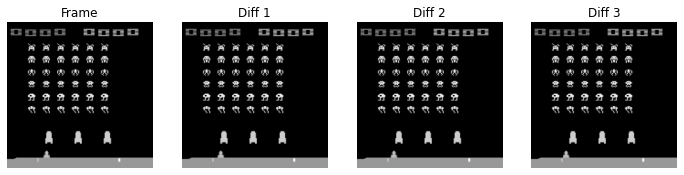

Step 49: observation shape: (224, 224, 4)


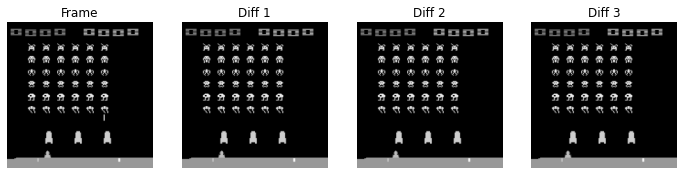

Step 50: observation shape: (224, 224, 4)


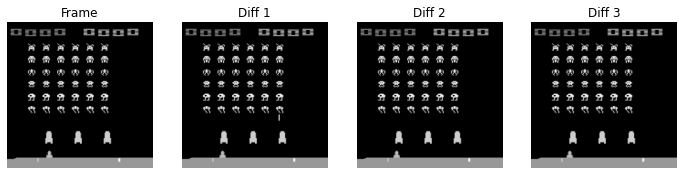

Step 51: observation shape: (224, 224, 4)


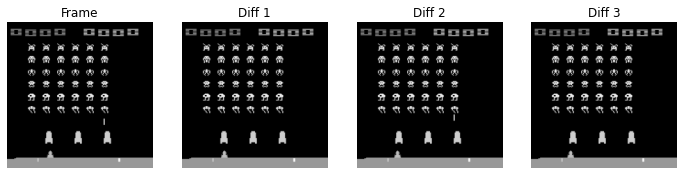

Step 52: observation shape: (224, 224, 4)


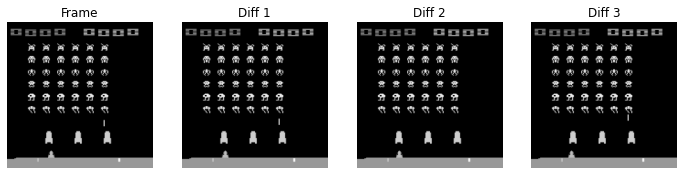

Step 53: observation shape: (224, 224, 4)


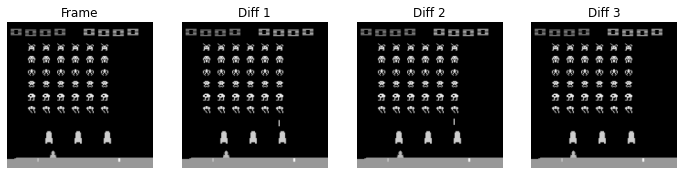

Step 54: observation shape: (224, 224, 4)


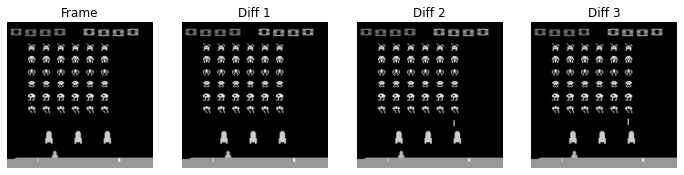

Step 55: observation shape: (224, 224, 4)


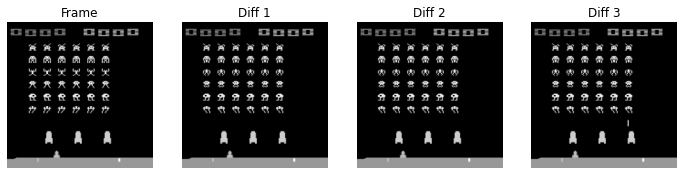

Step 56: observation shape: (224, 224, 4)


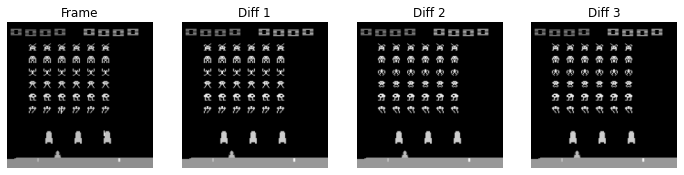

Step 57: observation shape: (224, 224, 4)


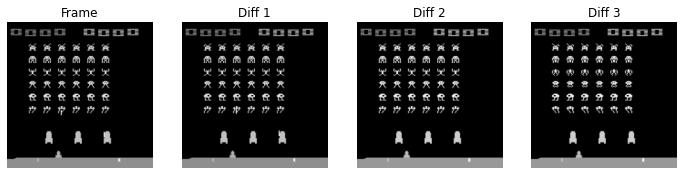

Step 58: observation shape: (224, 224, 4)


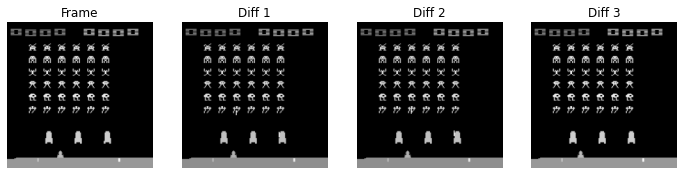

Step 59: observation shape: (224, 224, 4)


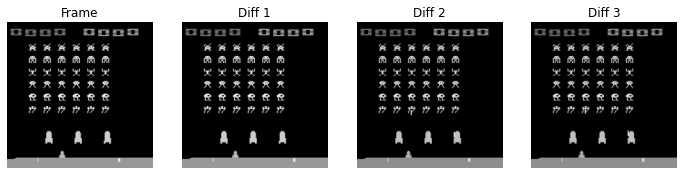

Step 60: observation shape: (224, 224, 4)


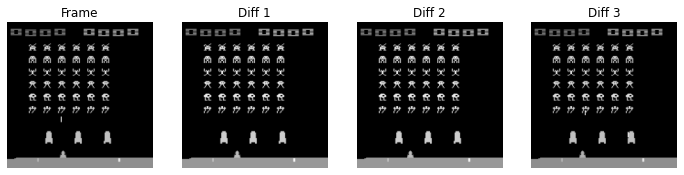

Step 61: observation shape: (224, 224, 4)


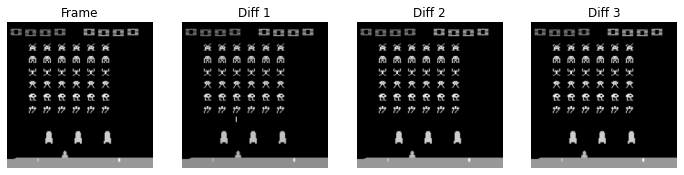

Step 62: observation shape: (224, 224, 4)


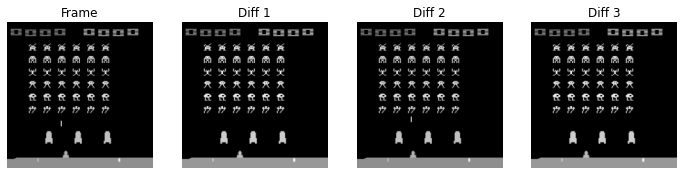

Step 63: observation shape: (224, 224, 4)


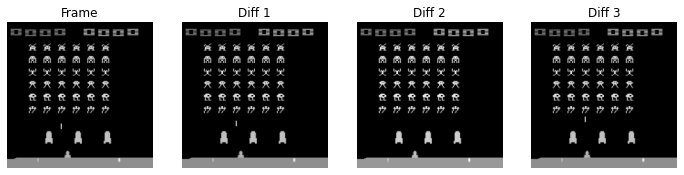

Step 64: observation shape: (224, 224, 4)


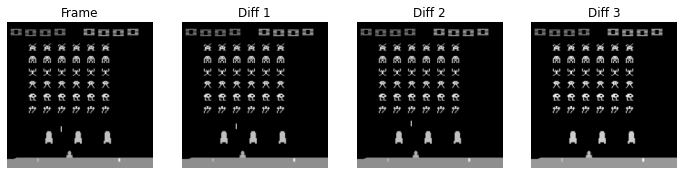

Step 65: observation shape: (224, 224, 4)


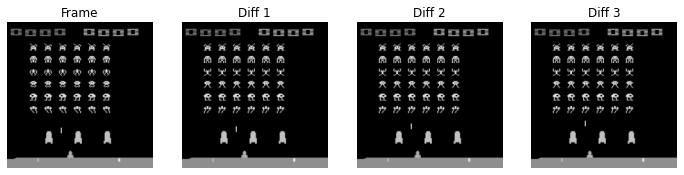

Step 66: observation shape: (224, 224, 4)


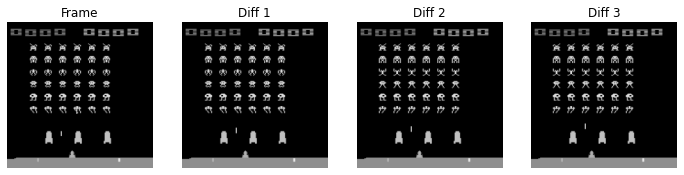

Step 67: observation shape: (224, 224, 4)


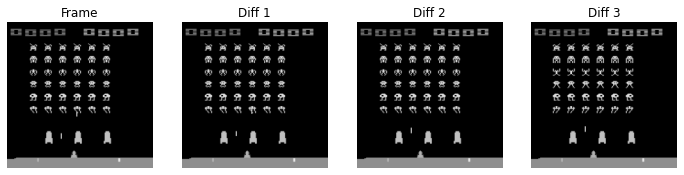

Step 68: observation shape: (224, 224, 4)


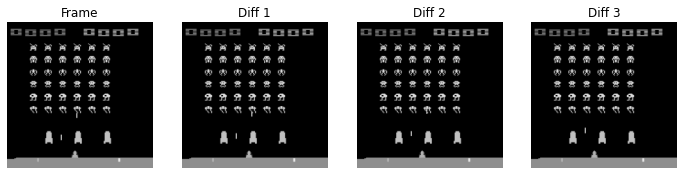

Step 69: observation shape: (224, 224, 4)


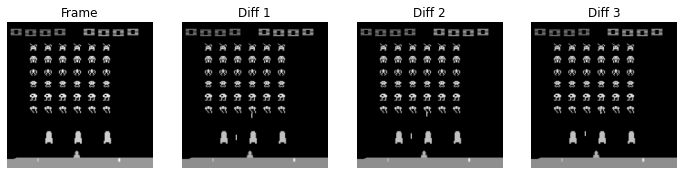

In [32]:
# Testovanie wrapperu
observation = stacked_env.reset()

for i in range(70):
    if i > 20:
        print(f"Step {i}: observation shape: {observation.shape}")
        
        # Vytvor figúru so 4 subplots vedľa seba
        fig, axs = plt.subplots(1, 4, figsize=(12, 4))  # 1 rad, 4 stĺpce

        # Zobrazenie každého frame-u vedľa seba
        axs[0].imshow(observation[..., 0], cmap='gray')
        axs[0].set_title("Frame")

        axs[1].imshow(observation[..., 1], cmap='gray')
        axs[1].set_title("Diff 1")

        axs[2].imshow(observation[..., 2], cmap='gray')
        axs[2].set_title("Diff 2")

        axs[3].imshow(observation[..., 3], cmap='gray')
        axs[3].set_title("Diff 3")

        # Skrytie osí (nepovinné)
        for ax in axs:
            ax.axis('off')

        # Zobrazenie celej figúry
        plt.show()


    observation, _, _, _, _ = stacked_env.step(2)